## 1. Limiting degree distribution

### (a) Consider a function $$G_{p}(x, n, p) = \sum_{k=0}^{n} P_{n, p}(k) x^{k} $$ with $$P_{n, p}(k) = \binom{n}{k} p^k (1-p)^{n-k}$$ as well as a function $$G_{Q}(x, \lambda) = \sum_{k = 0}^{\infty} Q_{\lambda}(k) x^k$$ with $$Q_{\lambda}(k) = \frac{e^{-\lambda} \lambda^{k}}{k!}$$ For $n \rightarrow \infty$ and $np \rightarrow \lambda$ show $G_{p}(x, n, p) \rightarrow G_{Q}(x, \lambda)$. Hint: use the binomial theorem to rewrite G(x, n, p)

$$G_{p}(x, n, p) = \sum_{k=0}^{n} \binom{n}{k} x^{k} p^{k} (1 - p)^{n - k} = \sum_{k=0}^{n} \binom{n}{k} (xp)^{k} (1-p)^{n - k}$$

Lets use the Binomial Theorem: $$(a + b)^{n} = \sum_{k=0}^{n} a^{n-k} b^{k}$$

$$G_{p}(x, n, p) = \sum_{k=0}^{n} \binom{n}{k} (xp)^{k} (1-p)^{n - k} = (1 - p + px)^{n}$$

Let's use L'Hopital's Rule: $$\lim_{n \rightarrow \infty} \left(1 + \frac{a}{n} \right)^{n} = e^{n}$$

$$lim_{n \rightarrow \infty} (G_{p}(x, n, p)) = lim_{n \rightarrow \infty} \left(1 + \frac{pn(x-1)}{n} \right)^{n} =\\ e^{np(x-1)} \rightarrow e^{\lambda(x-1)} = e^{-\lambda} e^{\lambda x}$$

Let's use Taylor-Macloran series: $$e^{a} = \sum_{k=0}^{\infty} \frac{a^{k}}{k!}$$

$$lim_{n \rightarrow \infty} (G_{p}(x, n, p)) \rightarrow e^{-\lambda} e^{\lambda x} = \sum_{k=0}^{\infty} \frac{e^{-\lambda} x^k \lambda^{k}}{k!}$$

Which is exactly equal to $G_{Q}(x, \lambda) = \sum_{k=0}^{\infty} \frac{e^{-\lambda} x^k \lambda^{k}}{k!}$

So proved that if $n \rightarrow \infty$ and $np \rightarrow \lambda$ so $G_{p}(x, n, p) \rightarrow G_{Q}(x, \lambda)$

### (b) In L05 we have shown that the degree of a random microstate generated by the G(n, p) model follow a Binomial distribution. We further stated that for $n \rightarrow \infty$ and $np \rightarrow \lambda$ the degree distribution converges to the Poisson distribution with parameter $\lambda$. Investigate the definition of so-called probability generating function and use it to explain how your proof from (a) can ve used to proove the convergence to a Poisson degree distribution.

Let's define probability generating function
$$
G_{P}(x) = \sum_{k=0}^{n} P_{n, p}(k) x^{k} =\\
\sum_{k=0}^{n} \binom{n}{k} (xp)^{k} (1-p)^{n - k} =\\
(1 - p + px)^{n} =\\
\left(1 + \frac{pn(x-1)}{n} \right)^{n}
$$

So let`s see the convergence of the generative function:
$$
lim_{n \rightarrow \infty} G_{P}(x) = lim_{n \rightarrow \infty} \left(1 + \frac{pn(x-1)}{n} \right)^{n} = e^{-\lambda} e^{\lambda x} = \sum_{k=0}^{\infty} \frac{e^{-\lambda} x^k \lambda^{k}}{k!}
$$

At the same time $G_{P}(x) = \sum_{k=0}^{n} P_{n, p}(k) x^{k} = \sum_{k=0}^{\infty} x^k P(k)$, where $P(k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$, which is exactly the probability mass function for Poisson distribution.

## 2. Diameter of random graphs

### (a) Consider the G(n, p) model of random graphs for a sufficiently large n and variable link probability p. Plot the dependency of the diameter of random realizations on the parameter p. Compare the observed dependency with the expected dependency based on the approximation of the diameter made in lecture L05. Explain possible discrepancies.

In [1]:
import pathpy as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import operator


plt.style.use('default')
sns.set_style("whitegrid")

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def get_the_diameter(n, p):
    g = pp.algorithms.largest_connected_component(pp.generators.random_graphs.ER_np(n, p, loops=False))
    return pp.algorithms.diameter(g)

In [3]:
n = 50
p_probabilities = np.arange(0.05, 1.05, 0.05)
diameters = []
predicted =[]

for cur_p in p_probabilities:
    k = n * cur_p
    diameters.append(get_the_diameter(n, cur_p))
    predicted.append(np.log(n) / np.log(k))

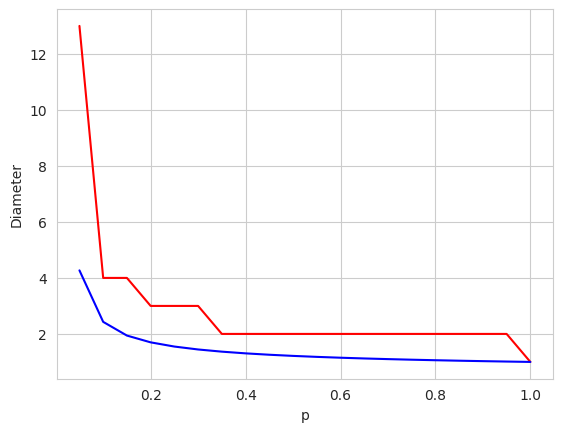

In [4]:
plt.xlabel("p")
plt.ylabel("Diameter")
ream_diams = plt.plot(p_probabilities, diameters, color='red')
predicted_diams = plt.plot(p_probabilities, predicted, color='blue')

Diameter values of generated networks are higher that expected values. In the L05 the formula for finding the diameter was: $$\sum_{I = 0}^{D} \langle k \rangle^I = \frac{\langle k \rangle^{D + 1} - 1}{\langle k \rangle - 1}$$ but for more simple calculations it was approximated as $\langle k \rangle^D$ so the discrepancies can be related to this approximation.

### (b) Use the G(n, p) model to generate a number of random microstates (undirected with self-loops) with a fixed expected degree $\langle k \rangle$. Plot the distribution of degrees of randomly chosen nodes in the generated microstates and compare it to the expected value hki. Repeat the same procedure for the degrees of neighbors of randomly chosen nodes. How do those distributions differ? Explain the phenomenon and how it might affect the approximation of the diameter made in lecture L05.

Mean degree =  2.44
Mean degree of neighbors of the randomly chosen node =  3.11
Expected degree =  2.5


<AxesSubplot:ylabel='Density'>

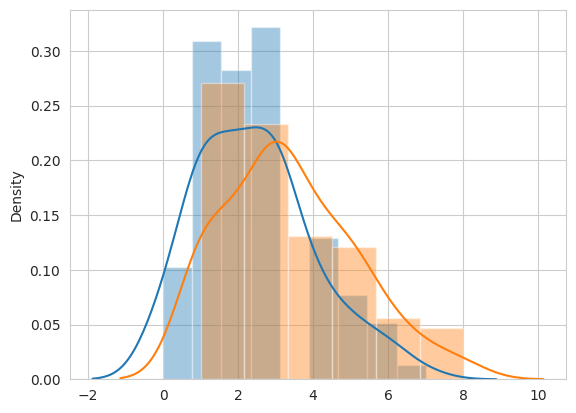

In [5]:
n = 100
p = 0.025
k = n * p
samples = 100

avg_deg = 0
avg_neighbor_deg = 0
degrees = []
neighbor_degrees = []

for _ in range(samples):
    network = pp.generators.ER_np(n=n, p=p, directed=False, loops=True)
    random_node = np.random.choice(list(network.nodes.uids))
    d = network.degrees()[random_node]
    avg_deg += d
    degrees.append(d)

    neighbors_of_random_node = list(network.neighbors[random_node])

    random_neighbor_pos = 0
    if not neighbors_of_random_node: continue
    if len(neighbors_of_random_node) > 1:
        random_neighbor_pos = np.random.randint(low=0, high=len(neighbors_of_random_node) - 1)

    random_neighbor = neighbors_of_random_node[random_neighbor_pos]
    d_neighbor = network.degrees()[random_neighbor.uid]
    avg_neighbor_deg += d_neighbor
    neighbor_degrees.append(d_neighbor)

print('Mean degree = ', avg_deg/samples)
print('Mean degree of neighbors of the randomly chosen node = ', avg_neighbor_deg/samples)
print('Expected degree = ', k)
sns.distplot(degrees)
sns.distplot(neighbor_degrees)

The mean degree is close to expected degree but at the same time the neighbours mean degree is quite higher. This phenomena is called friendship paradox and it happens because the neighbour degree has the distribution $q_{k} = \frac{(k+1)p_{k+1}}{\langle k \rangle}$. As the diameter uses the formula $D \approx \frac{log(n)}{log(\langle k \rangle)}$ so we expect the decrease of the diameter.

## 3. Watts-Strogatz Model

### (a) Use the Watts-Strogatz model to generate microstates that exhibit the small-world property. Operationalize the definition of weak vs. strong ties from lecture L05, i.e. define an edge-level measure that captures to what extent an edge can be considered a weak tie. Use your measure to highlight weak ties in a plot of generated microstates.

A tie is weak when an edge is the only or one of the only connections between two communities. A tie gets stronger as a community forms around the nodes of a given edge. This fact is connected to the "Betweenness Centrality" we defined in the first lectures. As a measure of "weakness" of a given tie, we propose that we can calculate the Betweenness Centrality for each node, and then take the average of the two ends of that value for any given edge - which gives us that edge's weakness.

In [6]:
n = pp.Network(directed=False)
n.add_edges(
    pp.Edge('f','g', weight=2, uid='f-g'),
    pp.Edge('g','d', weight=2, uid='g-d'),
    pp.Edge('f','d', weight=3, uid='f-d'),
    pp.Edge('f','e', weight=1, uid='f-e'),
    pp.Edge('e','f', weight=1, uid='e-f'),
    pp.Edge('d','e', weight=2, uid='d-e'),
    pp.Edge('b','d', weight=1, uid='b-d'),
    pp.Edge('b','c', weight=2, uid='b-c'),
    pp.Edge('a','b', weight=1, uid='a-b'),
    pp.Edge('c','a', weight=1, uid='c-a')
    )

ws = pp.generators.random_graphs.Watts_Strogatz(n=20, s=2, p=0)

In [7]:
def get_weakness_measures(n: pp.Network):
    measures = {}
    for edge in n.edges:
        n0, n1 = edge.nodes
        network_betweenness = pp.algorithms.centralities.betweenness_centrality(n)
        n0_betweenness = network_betweenness[n0]
        n1_betweenness = network_betweenness[n1]
        measures[f"{n0}-{n1}"] = (n0_betweenness + n1_betweenness) / 2

    #Normalize the measure
    s = sum(measures.values())
    return {i: j/s for i,j in measures.items()}

ws_weakness = get_weakness_measures(ws)
n_weakness = get_weakness_measures(n)
print(f"{ws_weakness=}\n")
print(f"{n_weakness=}")

ws_weakness={'0-1': 0.02499999999999999, '0-2': 0.025, '1-2': 0.024999999999999994, '1-3': 0.02499999999999999, '2-3': 0.025, '2-4': 0.025, '3-4': 0.025, '3-5': 0.025, '4-5': 0.025, '4-6': 0.025, '5-6': 0.025, '5-7': 0.025, '6-7': 0.025, '6-8': 0.025, '7-8': 0.025, '7-9': 0.025, '8-9': 0.025, '8-10': 0.025, '9-10': 0.025, '9-11': 0.025, '10-11': 0.025, '10-12': 0.025, '11-12': 0.025, '11-13': 0.025, '12-13': 0.025, '12-14': 0.025, '13-14': 0.024999999999999994, '13-15': 0.024999999999999994, '14-15': 0.024999999999999994, '14-16': 0.02499999999999999, '15-16': 0.02499999999999999, '15-17': 0.02499999999999999, '16-17': 0.024999999999999984, '16-18': 0.02499999999999999, '17-18': 0.02499999999999999, '17-19': 0.02499999999999999, '18-19': 0.024999999999999994, '18-0': 0.024999999999999994, '19-0': 0.024999999999999994, '19-1': 0.02499999999999999}

n_weakness={'f-g': 0.0078125, 'g-d': 0.1484375, 'f-d': 0.15625, 'f-e': 0.0078125, 'e-f': 0.0078125, 'd-e': 0.1484375, 'b-d': 0.2734375, 'b-c

In [8]:
n.plot(edge_color={max(n_weakness.items(),key=operator.itemgetter(1))[0] : "green"})

#For ws, everything is at its max.
ws.plot(edge_color="green")

The higher the value, the weaker the tie. We expect this measure to be constant across all edges for a Watts-Strogatz model with no random connections, given each node has the same betweenness centrality.

### (b) Show that the average clustering coefficient of a one-dimensional undirected ring lattice with parameter $s \geq 1$ is $\frac{3s-3}{4s-2}$.

Going back to the definition of clustering coefficient, we observe that $C_{v} = \frac{\text{the number of finished triangles}}{\text{number of triples}}$

The formula for the global clustering coefficient: $$C = \frac{\sum_{v \in V} C_{v}}{n}$$

Here we have a ring lattice which implies that $$C_{v} = C$$.

When n is fixed and $x \geq 1$ $$ number of finished triangles = \frac{3s(s-1)}{2}$$ and $$number of triples = \frac{2s(s-1)}{2}$$

So $$C = \frac{\frac{3s(s-1)}{2}}{\frac{2s(2s-1)}{2}} = \frac{3s-1}{4s-2}$$

### (c) Use the Watts-Strogatz model to generate ring lattice networks (rewiring probability p = 0) with different lattice parameters s ≥ 1. Plot the dependency of the average shortest path length of the ring lattice networks on the lattice parameter s.

In [11]:
def plot_small_world(n, s_range, samples=1):
    ccs = []
    apls = []

    for s in s_range:
        cc = 0
        apl = 0
        for _ in range(samples):
            ws = pp.generators.random_graphs.Watts_Strogatz(n, s=s, p=0)
            apl += pp.algorithms.avg_path_length(ws)
        ccs.append(cc/samples)
        apls.append(apl/samples)
        print('Finished for s = {0}'.format(s))

    plt.clf()
    plt.plot(s_range, apls)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.grid(True)
    plt.xlabel('$s$', fontsize=20)
    plt.ylabel('$I$', fontsize=20)
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.25)
    plt.show()

Finished for s = 0
Finished for s = 1
Finished for s = 2
Finished for s = 3
Finished for s = 4
Finished for s = 5
Finished for s = 6
Finished for s = 7
Finished for s = 8
Finished for s = 9


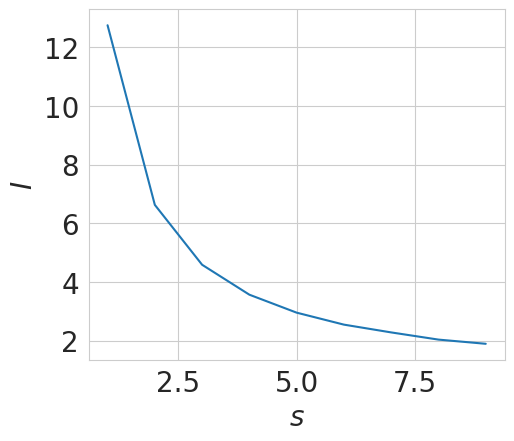

In [12]:
s_range = [i for i in range(10)]
plot_small_world(50, s_range, samples=10)

As s (the number of nearest neighbors that will be connected in the ring lattice) goes up, average shortest path length naturally decreases, as on average there is a higher chance of finding a shortest path between two randomly selected nodes (There are comparatively more neighbors to choose from for each node at each iteration of the s variable).